# Predicting Dementia and Alzheimer's

Tutorial by Amy Cruz & Samuel Howard

## Why try to Predict Dementia and Alzheimer's?

Millions of people suffer from Dementia or Alzheimer's in the United States. Although Dementia and Alzheimer's are often confused with one another, they are separate conditions. Dementia is an umbrella term used to describe several symptoms that inhibit thinking ability, while Alzheimer's is a degenerative brain disease that often leads to Dementia. Alzheimer's disease can begin 20 years prior to symptoms appearing and therapy has been found to improve the quality of life for those with the disease. For these reasons, predicting both Dementia and Alzheimers is valuable in reducing the suffering caused by these conditions.

It is common knowledge that Dementia and Alzheimer's typically affect the elderly, but genetics are another major risk factor for both conditions. In this tutorial, we will investigate whether other factors could be used to reliably predict Dementia and Alzheimer's.

(Information Sourced from https://www.alz.org/media/Documents/alzheimers-facts-and-figures.pdf)

## Gathering Data

Fortunately for us, data has been collected relating to Dementia and Alzheimer's. There are several publicly available datasets that could be used to assess how Dementia and Alzheimer's can be predicted. We chose to investigate [MRI data from the Open Access Series of Imaging Studies (OASIS) project](https://www.kaggle.com/jboysen/mri-and-alzheimers). This dataset has a good combination of simple attributes (sex, age, etc.) and attributes only measurable via an MRI. 

Another dataset we considered was [Questionnaire Response Data from the CDC](https://healthdata.gov/dataset/alzheimers-disease-and-healthy-aging-data). This data would be good for further analysis, but we found it more difficult to interpret than the OASIS data.

We downloaded the MRI data from [Kaggle](https://www.kaggle.com/jboysen/mri-and-alzheimers) and obtained the files:

- [oasis_cross-sectional.csv](https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_cross-sectional.csv) : This data consists of over 400 samples corresponding to MRI scans of individuals between 18 and 96. 'Cross-sectional' refers to the fact that the data was collected at a single point in time for each individual.
- [oasis_longitudinal.csv](https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv) : This data consists of over 300 samples corresponding to MRI scans of 150 individuals between 60 and 96. 'Longitudinal' refers to the fact that the data was collected at multiple points in time for each individual.

Then we simply used Pandas to bring the data in and store the data in Pandas dataframes:

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Use Pandas to read the longitudinal data into a dataframe and print the 
# first few rows of the dataframe
data = pd.read_csv('oasis_longitudinal.csv', sep = ',')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


The longitudinal data consists of samples with the following features:
- Subject ID: Identifier for the individual
- MRI ID: Identifier for the specific scan of an individual
- Group: Whether the individual is Nondemented, Demented, or converted (began as nondemented in initial scan(s) before being classified as demented)
- Visit: Which visit this scan was for the corresponding individual
- MR Delay: MRI delay time
- M/F: Sex of the individual
- Hand: Dominant hand of the individual
- Age: Age of the individual
- EDUC: Education level
- SES: [Hollingshead Four-Factor Index of Socioeconomic Status](http://fcon_1000.projects.nitrc.org/indi/enhanced/assessments/ses-child.html#:~:text=The%20Hollingshead%20Four%20Factor%20Index,educational%20attainment%2C%20and%20occupational%20prestige.)
- MMSE: [Mini-Mental State Exam](https://www.ncbi.nlm.nih.gov/projects/gap/cgi-bin/GetPdf.cgi?id=phd001525.1)
- CDR: [Clinical Dementia Rating](https://www.madrc.org/clinical-dementia-rating-cdr-scale)
- eTIV: Estimated total intracranial volume
- nWBV: Normalized whole-brain volume
- ASF: Atlas scaling factor, proportional to eTIV


In [2]:
# Use Pandas to read the cross-sectional data into a dataframe and print the 
# first few rows of the dataframe
data2 = pd.read_csv('oasis_cross-sectional.csv', sep = ',')
data2.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


The cross-sectional data consists of the same features as the longitudinal data, except it is missing subject ID, Group, and Visit.

## Exploratory Data Analysis

To start the analysis we decided to do a heatmap of correlations and a correlation matrix to see if there were any patterns or strong relationships between the independent variables and the dependent variables that were discussed. 
<br>
Dependent variables:


*   CDR
*   MMSE
*   Group

Independent variables:


*   Subject ID
*   MRI ID
*Visit 
*MR Delay
*M/F
*HAnd
*Age
*EDUC
*SES
*MMSE
*CDR
*eTIV
*nWBV
*ASF






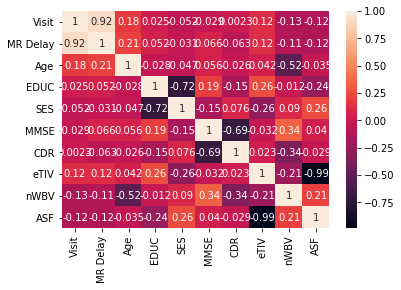

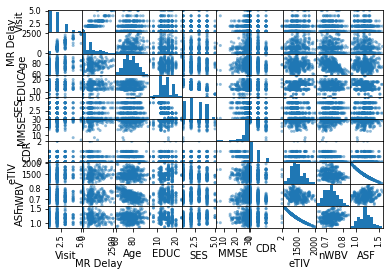

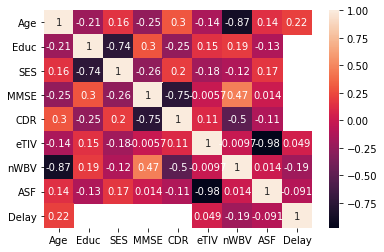

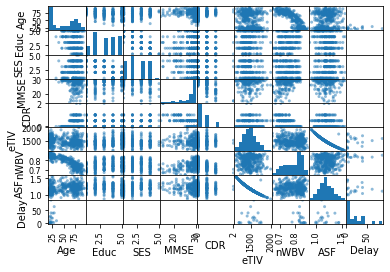

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt

corr = data.corr()
sn.heatmap(corr, annot = True)
plt.show()
scatter_matrix(data)
plt.show()

corr = data2.corr()
sn.heatmap(corr, annot = True)
plt.show()
scatter_matrix(data2)
plt.show()

**Initial Analysis:**
<br> 
*Cross-Sectional:*
<br>
Based on the heatmap most of the highest correlation between independent and dependent variables is 0.34 between MMSE and nWBV. This is a low positive correlation and the rest of the positive correlations are even lower. The same goes for the negative correlation relationships between the variables, with the most negative relationship being -0.34 between CDR and nWBV.
<br> 
<br> 
An assumption that can be made about MMSE and nWBV is that as the participant who scores a high MMSE score have a higher normalized whole brain volume. This would make sense because they since they have a higher brain volume than they have more use with their brain and are less likely to be demented. This assumption can be made because they have a positive correlation.
<br>
A similar assumption can be made for the CDR an nWBV. Participants with higher scores greater than 0 have between very mild to moderate Dementia. If the participant scores high with CDR than they have a smaller nWBV, thus giving the negative correlation. 
<br>
<br>
*Longitudinal:*
<br>
Based on the heatmap and the correlation matrix we can see a similar trend to that of the Cross-Sectional data. The highest positive correlation is between MMSE and nWBV with the correlation of 0.47. And the lowest negative correlation is between CDR and nWBV with the correlation of -0.5. These correlations have the same assumptions as in the Cross-Sectional data. 
<br>
<br>
Another interesting relationship is that MMSE and Age have a relatively strong (relative to the data set) negative correlation  of -0.25. Meaning that with more age you will have a lower MMSE score. Also MMSE and Education have a relatively strong positive correlation (relative to the data set) of 0.3, meaning that having people who have had more years of education have greater probability to score a higher MMSE score. 



**Longitudinal regression analysis:**
<br>
The analysis of R<sup>2</sup> done below is to see the strength of the variation of the dependent variable and the independent variable.
<br> 
The p-value that is given also tells us, if it's less than .05 (from the 95% confidence interval), it has a signinficant relationship bewteen the variables.
<br>
<br>
The variables that were chosen for this analysis were chosen because of the strength of their correlation based on the heatmap and the correlation matrix. 
<br> <br>

***Summary of the Analysis:*** <br>
*nWBV vs MMSE:*<br>
R<sup>2</sup> = 0.984 <br>
P>|t| = 0.00<br>
The  R<sup>2</sup> value tells us that 98.4% of the observed variation  for MMSE can be explained by nWBV.<br>
The P>|t| indicates that there is a statistically significant relationship between nWBV and MMSE<br>
<br>

*SES, EDUC vs MMSE:*<br>
SES and EDUC were added together because it increased the the R<sup>2</sup> value. This was discoved because they had a strong negative correlation between each other. <br>
R<sup>2</sup> = 0.975 <br>
P>|t| = 0.00<br>
The  R<sup>2</sup> value tells us that 97.5% of the observed variation  for MMSE can be explained by SES and EDUC.<br>
The P>|t| indicates that there is a statistically significant relationship between SES and nWBV and MMSE<br>
<br>




In [4]:
#SLR
# Needed to remove the nan rows because it wouldnt work with nan
no_nan_data = data.dropna()
# Independent Variable
X = no_nan_data['nWBV']
# Dependent Variable
y = no_nan_data['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.184e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   1.56e-319
Time:                        03:14:10   Log-Likelihood:                         -944.57
No. Observations:                 354   AIC:                                      1891.
Df Residuals:                     353   BIC:                                      1895.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nWBV          37.5428      0.254    147.797      0.000      37.043      38.042
==============================================================================
Omnibus:                      166.386   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.554
Skew:                          -1.987   Prob(JB):                    7.32e-181
Kurtosis:                       9.360   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#MLR
# Independent Variable
X = no_nan_data[['SES','EDUC']]
# Dependent Variable
y = no_nan_data['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              6748.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   2.02e-281
Time:                        03:14:10   Log-Likelihood:                         -1027.6
No. Observations:                 354   AIC:                                      2059.
Df Residuals:                     352   BIC:                                      2067.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SES            2.5983      0.157     16.564      0.000       2.290       2.907
EDUC           1.4123      0.028     49.814      0.000       1.357       1.468
==============================================================================
Omnibus:                       79.753   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.300
Skew:                          -1.181   Prob(JB):                     9.42e-36
Kurtosis:                       5.315   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Cross-Sectional regression analysis:**

The variables what were chosen for this analysis were chosen because of the strength of their correlation based on the heatmap and the correlation matrix. 
<br>

***Summary of the Analysis:*** <br>
*nWBV vs MMSE:*<br>
R<sup>2</sup> = 0.988<br>
P>|t| = 0.00<br>
The  R<sup>2</sup> value tells us that 98.8% of the observed variation  for MMSE can be explained by nWBV.<br>
The P>|t| indicates that there is a statistically significant relationship between nWBV and MMSE<br>
<br>

*SES, EDUC vs MMSE:*<br>
SES and EDUC were added together because it increased the the R<sup>2</sup> value. This was discoved because they had a strong negative correlation between each other. <br>
R<sup>2</sup> = 0.965 <br>
P>|t| = 0.00<br>
The  R<sup>2</sup> value tells us that 96.5% of the observed variation  for MMSE can be explained by SES and EDUC.<br>
The P>|t| indicates that there is a statistically significant relationship between SES and nWBV and MMSE<br>
<br>

*Age vs MMSE:*<br>
R<sup>2</sup> = 0.944 <br>
P>|t| = 0.00<br>
The  R<sup>2</sup> value tells us that 94.4% of the observed variation  for MMSE can be explained by nWBV.<br>
The P>|t| indicates that there is a statistically significant relationship between Age and MMSE<br>
<br>



In [6]:
# Indepenent Variable
no_nan_long = data2.drop(['Delay'], axis=1)
no_nan_long = no_nan_long.dropna()
X = no_nan_long["nWBV"]
# Dependent Variable
y = no_nan_long["MMSE"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.780e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   1.00e-208
Time:                        03:14:10   Log-Likelihood:                         -544.41
No. Observations:                 216   AIC:                                      1091.
Df Residuals:                     215   BIC:                                      1094.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nWBV          36.3988      0.273    133.407      0.000      35.861      36.937
==============================================================================
Omnibus:                       38.571   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.192
Skew:                          -1.065   Prob(JB):                     1.04e-12
Kurtosis:                       4.263   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Indepenent Variable
X = no_nan_long[['SES','Educ']]
# Dependent Variable
y = no_nan_long["MMSE"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2971.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   7.82e-157
Time:                        03:14:10   Log-Likelihood:                         -659.85
No. Observations:                 216   AIC:                                      1324.
Df Residuals:                     214   BIC:                                      1330.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SES            4.5890      0.187     24.480      0.000       4.219       4.959
Educ           4.7318      0.146     32.310      0.000       4.443       5.020
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.360
Skew:                          -0.192   Prob(JB):                        0.507
Kurtosis:                       2.941   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Indepenent Variable
X = no_nan_long["Age"]
# Dependent Variable
y = no_nan_long["MMSE"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3653.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   6.85e-137
Time:                        03:14:10   Log-Likelihood:                         -710.57
No. Observations:                 216   AIC:                                      1423.
Df Residuals:                     215   BIC:                                      1427.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.3642      0.006     60.436      0.000       0.352       0.376
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.122
Skew:                           0.019   Prob(JB):                        0.571
Kurtosis:                       2.649   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cleaning the Data

In order to understand the data better, we want to perform some cleaning of the data. Overall, the goals for this cleaning are to make the data from the cross-sectional dataset more easily comparable to the data from the longitudinal dataset, remove unnecessary columns, separate compound data from exisitng columns into separate columns, and to reorganize the dataframe to make it easier to visibly assess. 

The cross-sectional dataset is missing the Subject ID and Visit columns, but this information is still found in the ID column, so we will pull those features out of the ID and make them into their own columns (like how the longitudinal dataset stores this information).

After cleaning, we see that the visit and delay columns each consist of a single value, so they will not be useful for analysis. So we remove them. The samples that were second visits are not the focus of the cross-sectional data, so we put them into a separate dataframe.

This cleaning is performed below:

In [9]:
# Make a duplicate of the cross-sectional data
cs_data = data2.copy()

# Every subject in the study was right handed, so we do not need to keep that 
# information in the dataframe. Remove it using 'drop'.
cs_data = cs_data.drop(['Hand'], axis=1)

# The longitudinal data conveniently has columns for both subject ID and
# visit number. Both of these features are visible in the ID, but lets
# make separate  columns for them for convenience and consistency.
for index, row in cs_data.iterrows():
  cs_data.at[index, "Subject ID"] = row["ID"][:-4]
  cs_data.at[index, "Visit"] = int(row["ID"][-1])

# Reorder the columns so that subject ID and Visit appear after ID
reordered_columns = ['ID', 'Subject ID', 'Visit', 'M/F', 'Age', 'Educ', 
                     'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']
cs_data = cs_data[reordered_columns]

# Part of the dataset consists of 20 individuals who were nondemented and
# imaged a second time. For now, lets isolate this data. We can do this
# easily thanks to the Visit feature we engineered
cs_reliability_data = cs_data[cs_data["Visit"] == 2]

# Now the primary data is the rest of the data, consisting of initial visits
cs_primary_data = cs_data[cs_data["Visit"] == 1]

# Now the primary data set is entirely made of initial visits, so we
# do not need the Visit column. It also looks like the Delay column is
# now entirely NaN, we can use dropna to drop this column (and any other
# column that happens to be all NaN, none for now)
cs_primary_data = cs_primary_data.dropna(axis=1, how='all')
cs_primary_data = cs_primary_data.drop(['Visit'], axis=1)

cs_primary_data

,ID,Subject ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,OAS1_0001,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,OAS1_0002,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,OAS1_0003,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0004_MR1,OAS1_0004,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,OAS1_0005_MR1,OAS1_0005,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,OAS1_0453,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,OAS1_0454_MR1,OAS1_0454,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,OAS1_0455_MR1,OAS1_0455,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,OAS1_0456_MR1,OAS1_0456,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


The longitudinal data was alot closer to what we wanted before cleaning than the cross-sectional data. However, we wanted to encode the Group column into separate "dummie" columns. This means that each unique value within the Group column would have a corresponding column consisting of 1s and 0s representing the value of the Group column. This is done to allow for easier analysis later on.

In [10]:
# Duplicate the longitudinal data
long_data = data.copy()
# Every subject in the study was right handed, so we do not need to keep that 
# information in the dataframe. Remove it using 'drop'.
long_data.drop(['Hand'], axis=1, inplace=True)

# Create dummie features for 'Group' and add them to the dataframe
dummies = pd.get_dummies(long_data['Group'])
long_data['Converted'] = dummies['Converted']
long_data['Nondemented'] = dummies['Nondemented']
long_data['Demented'] = dummies['Demented']
long_data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Converted,Nondemented,Demented
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,1,0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,1,0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,0,0,1
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,0,0,1
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,0,0,1
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,0,0,1
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,1,0
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,1,0


## Exploratory Data Analysis on the Cleaned Data

This analysis was conducted to see if once the data was cleaned if the correlations between the variables would change. Also given the new variable: converted, nondememnted, and demented we wanted to see if there were better correlation between the new dependent variables and the independent variables. 


cross data


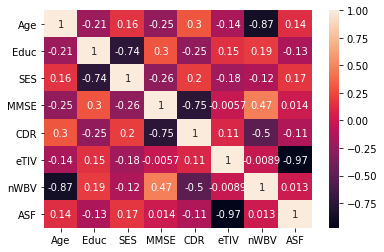

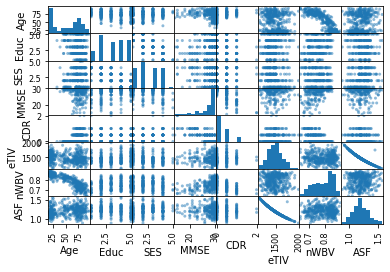

long data


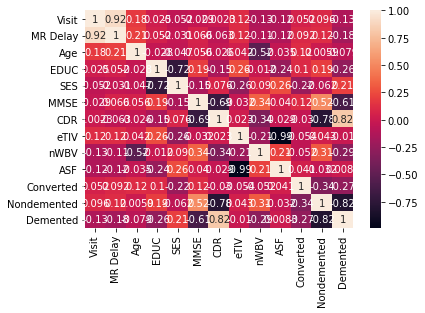

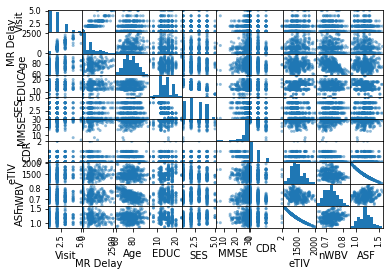

In [11]:
# checking for relationships once data is cleaned, not sure if necessary
corr = cs_primary_data.corr()
sn.heatmap(corr, annot = True)
print('cross data')
plt.show()
scatter_matrix(cs_primary_data)
plt.show()

print('long data')
corr = long_data.corr()
sn.heatmap(corr, annot = True)
plt.show()
scatter_matrix(data)
plt.show()

**Cleaned Cross Sectional analysis:**

The variables that were chosen for this analysis were chosen because of the strength of their correlation based on the heatmap and the correlation matrix. 
<br>

***Summary of the Analysis:*** <br>
*nWBV vs MMSE:*<br>
R<sup>2</sup> = 0.988<br>
P>|t| = 0.00<br>

*SES, EDUC vs MMSE:*<br>
R<sup>2</sup> = 0.965 <br>
P>|t| = 0.00<br>

*Age vs MMSE:*<br>
R<sup>2</sup> = 0.944 <br>
P>|t| = 0.00<br>


In [12]:
# Cross regression results after cleaning
cs_nonan = cs_primary_data.dropna()
X = cs_nonan['nWBV']
y = cs_nonan['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.780e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   1.00e-208
Time:                        03:14:19   Log-Likelihood:                         -544.41
No. Observations:                 216   AIC:                                      1091.
Df Residuals:                     215   BIC:                                      1094.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nWBV          36.3988      0.273    133.407      0.000      35.861      36.937
==============================================================================
Omnibus:                       38.571   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.192
Skew:                          -1.065   Prob(JB):                     1.04e-12
Kurtosis:                       4.263   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
cs_nonan = cs_primary_data.dropna()
X = cs_nonan[['SES','Educ']]
y = cs_nonan['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2971.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   7.82e-157
Time:                        03:14:19   Log-Likelihood:                         -659.85
No. Observations:                 216   AIC:                                      1324.
Df Residuals:                     214   BIC:                                      1330.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SES            4.5890      0.187     24.480      0.000       4.219       4.959
Educ           4.7318      0.146     32.310      0.000       4.443       5.020
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.360
Skew:                          -0.192   Prob(JB):                        0.507
Kurtosis:                       2.941   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
cs_nonan = cs_primary_data.dropna()
X = cs_nonan["Age"]
y = cs_nonan["MMSE"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3653.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   6.85e-137
Time:                        03:14:19   Log-Likelihood:                         -710.57
No. Observations:                 216   AIC:                                      1423.
Df Residuals:                     215   BIC:                                      1427.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.3642      0.006     60.436      0.000       0.352       0.376
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.122
Skew:                           0.019   Prob(JB):                        0.571
Kurtosis:                       2.649   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Longitudinal regression analysis:**

***Summary of the Analysis:*** <br>
*nWBV vs MMSE:*<br>
R<sup>2</sup> = 0.984<br>
P>|t| = 0.00<br>
This R<sup>2</sup> is .02 points less than the uncleaned analysis. This may be because cleaning the data removed significant entries. 

*SES, EDUC vs MMSE:*<br>
R<sup>2</sup> = 0.975 <br>
P>|t| = 0.00<br>
The  R<sup>2</sup> increased by 0.1, which could mean that some of the data that was removed was negativley affecting the SES, EDUC, and/or MMSE columns.<br>
<br>

*Age vs MMSE:*<br>
R<sup>2</sup> = 0.974 <br>
P>|t| = 0.00<br>
Again the R<sup>2</sup> increased by .03 which could mean the uncleaned data was hindering these variables. 
<br><br>
*Converted analysis*

While doing this analysis it was concluded that the R<sup>2</sup> for all of the regressions were all less than 0.2 meaning the independent variables may not be significant by themselves for this dependent variable. They did all have P>|t| = 0.00 meaning they are significant.

*Nondemented analysis*
Most of the R<sup>2</sup> resulted in being slightly higher than 0.5, meaning that these variables did have more significance in the variance of being nondemented.

*Demented analysis*
For the demented analysis the R<sup>2</sup> ranged between 0.3 and 0.4, showing that about a third of the observed variations were explained with those inputs. The P>|t| for all were also 0.00

In [15]:
long_nonan = long_data.dropna()
X = long_nonan['nWBV']
y = long_nonan['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.184e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   1.56e-319
Time:                        03:14:20   Log-Likelihood:                         -944.57
No. Observations:                 354   AIC:                                      1891.
Df Residuals:                     353   BIC:                                      1895.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nWBV          37.5428      0.254    147.797      0.000      37.043      38.042
==============================================================================
Omnibus:                      166.386   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.554
Skew:                          -1.987   Prob(JB):                    7.32e-181
Kurtosis:                       9.360   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = long_nonan[['SES','EDUC']]
y = long_nonan['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              6748.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   2.02e-281
Time:                        03:14:20   Log-Likelihood:                         -1027.6
No. Observations:                 354   AIC:                                      2059.
Df Residuals:                     352   BIC:                                      2067.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SES            2.5983      0.157     16.564      0.000       2.290       2.907
EDUC           1.4123      0.028     49.814      0.000       1.357       1.468
==============================================================================
Omnibus:                       79.753   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.300
Skew:                          -1.181   Prob(JB):                     9.42e-36
Kurtosis:                       5.315   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = long_nonan['Age']
y = long_nonan['MMSE']
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MMSE   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.300e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                   1.51e-280
Time:                        03:14:20   Log-Likelihood:                         -1034.6
No. Observations:                 354   AIC:                                      2071.
Df Residuals:                     353   BIC:                                      2075.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.3525      0.003    113.996      0.000       0.346       0.359
==============================================================================
Omnibus:                       48.787   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.896
Skew:                          -0.861   Prob(JB):                     5.45e-17
Kurtosis:                       4.454   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
X = long_nonan[["EDUC","SES"]]
y = long_nonan["Converted"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Converted   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.123
Method:                 Least Squares   F-statistic:                              25.81
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    3.47e-11
Time:                        03:14:20   Log-Likelihood:                         -78.350
No. Observations:                 354   AIC:                                      160.7
Df Residuals:                     352   BIC:                                      168.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EDUC           0.0114      0.002      5.866      0.000       0.008       0.015
SES           -0.0278      0.011     -2.592      0.010      -0.049      -0.007
==============================================================================
Omnibus:                      179.353   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.240
Skew:                           2.429   Prob(JB):                    9.29e-135
Kurtosis:                       7.273   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X = long_data["Age"]
y = long_data["Converted"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Converted   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              43.81
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    1.27e-10
Time:                        03:14:20   Log-Likelihood:                         -77.563
No. Observations:                 373   AIC:                                      157.1
Df Residuals:                     372   BIC:                                      161.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0013      0.000      6.619      0.000       0.001       0.002
==============================================================================
Omnibus:                      210.666   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.393
Skew:                           2.677   Prob(JB):                    5.42e-188
Kurtosis:                       8.179   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X = long_data["nWBV"]
y = long_data["Nondemented"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Nondemented   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                              409.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    6.23e-62
Time:                        03:14:20   Log-Likelihood:                         -265.02
No. Observations:                 373   AIC:                                      532.0
Df Residuals:                     372   BIC:                                      536.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nWBV           0.7072      0.035     20.235      0.000       0.638       0.776
==============================================================================
Omnibus:                     1656.603   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.528
Skew:                          -0.036   Prob(JB):                     4.36e-14
Kurtosis:                       1.012   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = long_nonan[["EDUC",'SES']]
y = long_nonan["Nondemented"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Nondemented   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              216.1
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    5.81e-62
Time:                        03:14:20   Log-Likelihood:                         -250.36
No. Observations:                 354   AIC:                                      504.7
Df Residuals:                     352   BIC:                                      512.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EDUC           0.0321      0.003     10.160      0.000       0.026       0.038
SES            0.0274      0.017      1.572      0.117      -0.007       0.062
==============================================================================
Omnibus:                     1707.431   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.310
Skew:                          -0.147   Prob(JB):                     1.61e-12
Kurtosis:                       1.104   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = long_data["nWBV"]
y = long_data["Demented"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Demented   R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.375
Method:                 Least Squares   F-statistic:                              224.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    4.86e-40
Time:                        03:14:20   Log-Likelihood:                         -266.28
No. Observations:                 373   AIC:                                      534.6
Df Residuals:                     372   BIC:                                      538.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nWBV           0.5254      0.035     14.983      0.000       0.456       0.594
==============================================================================
Omnibus:                     1955.913   Durbin-Watson:                   0.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.432
Skew:                           0.443   Prob(JB):                     2.77e-14
Kurtosis:                       1.202   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = long_nonan[["EDUC",'SES']]
y = long_nonan["Demented"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Demented   R-squared (uncentered):                   0.381
Model:                            OLS   Adj. R-squared (uncentered):              0.378
Method:                 Least Squares   F-statistic:                              108.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    1.91e-37
Time:                        03:14:20   Log-Likelihood:                         -235.83
No. Observations:                 354   AIC:                                      475.7
Df Residuals:                     352   BIC:                                      483.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EDUC           0.0055      0.003      1.815      0.070      -0.000       0.011
SES            0.1102      0.017      6.577      0.000       0.077       0.143
==============================================================================
Omnibus:                     7516.668   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.953
Skew:                           0.556   Prob(JB):                     2.34e-11
Kurtosis:                       1.557   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Machine Learning

We want to apply machine learning to the problem of predicting dementia and Alzheimer's. Machine learning is an umbrella term for algorithms that become better at performing tasks by being given data, effectively 'learning' through experience. Our goal in using machine learning is to predict measures related to the presence of dementia and Alzheimer's using some of the other features of our dataset.

We will start with a relatively simple technique in machine learning, linear regression. Linear regression optimizes an equation that takes in some predictor features and outputs a predicted value of a target feature. The linear regression algorithm is fed training data that consists of the predictor variables and the target variable. Using this data, the algorithm attempts to minimize loss. Loss is the difference (measured in different ways) between predicted values and the actual values. The end result of this process is a set of coefficients that are paired with the predictor variables in order to predict target values for new sample data that the algorithm did not see.

That's the basics of how linear regression works, but we do not have to implement it from scratch as we can use existing implementations from scikit-learn. Below we use a linear regression implementation from scikit-learn to create a linear regression models using age, education level, socioeconomic status, eTIV, nWBV, and ASF to predict MMSE and CDR (one model for each of the two target features) from the cross-sectional data.

[Text(0, 0.5, 'MMSE model residual'),
 Text(0.5, 0, 'Socioeconomic status (Hollingshead Index)'),
 Text(0.5, 1.0, 'MMSE Model Residuals with SES (CS)')]

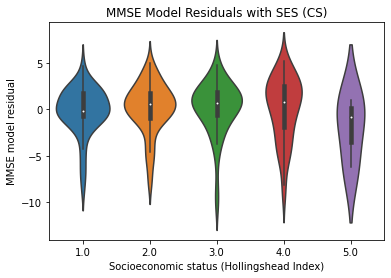

In [30]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
import seaborn as sns

# For linear regression we will drop rows with NaN values
cs_primary_data = cs_primary_data.dropna()

# Isolate the features that will be used as predictors
cs_input = [
         cs_primary_data['Age'],
         cs_primary_data['Educ'],cs_primary_data['SES'],
         cs_primary_data['eTIV'],cs_primary_data['nWBV'],
         cs_primary_data['ASF']]
cs_input = np.vstack(cs_input)
cs_input = cs_input.transpose()

# Fit a model for predicting MMSE
mmse_model = LinearRegression().fit(cs_input, cs_primary_data['MMSE'])

# Fit a model for predicting CDR
cdr_model = LinearRegression().fit(cs_input, cs_primary_data['CDR'])

# Calculate the residual for each row in the dataframe
for index, row in cs_primary_data.iterrows():
    cs_primary_data.loc[index, "MMSE_residual"] = row["MMSE"] \
    - mmse_model.predict(np.array([
        cs_primary_data['Age'][index],cs_primary_data['Educ'][index],
        cs_primary_data['SES'][index],cs_primary_data['eTIV'][index],
        cs_primary_data['nWBV'][index],cs_primary_data['ASF'][index],
    ]).reshape(1, -1))

    cs_primary_data.loc[index, "CDR_residual"] = row["CDR"] \
    - cdr_model.predict(np.array([
        cs_primary_data['Age'][index],cs_primary_data['Educ'][index],
        cs_primary_data['SES'][index],cs_primary_data['eTIV'][index],
        cs_primary_data['nWBV'][index],cs_primary_data['ASF'][index],
    ]).reshape(1, -1))

# Make a violin plot of mmse model residuals vs. SES
cs_mmse_violin_plot = sns.violinplot(x=cs_primary_data['SES'],
                                  y=cs_primary_data['MMSE_residual'])
cs_mmse_violin_plot.set(xlabel='Socioeconomic status (Hollingshead Index)',
                        ylabel='MMSE model residual',
                        title='MMSE Model Residuals with SES (CS)')

Above is a graph of the residuals from the MMSE linear regression model. This shows how large the loss can be between actual MMSE and predicted MMSE (separated in the graph by SES for visibility) from our MMSE linear regression model for the cross-sectional data. This is why the average losses are somewhat close to zero because linear regression attempts to minimize loss. Unfortunately, we would want less outlier residuals if we wanted our regression model to accurately predict MMSE. This indicates that the relationship between our predictors and MMSE is more complicated than what logistic regression is capable of (at least without more complicated tuning of the model).

Below is a similar graph of residuals for the CDR linear regression model.

[Text(0, 0.5, 'CDR model residual'),
 Text(0.5, 0, 'Socioeconomic status (Hollingshead Index)'),
 Text(0.5, 1.0, 'CDR Model Residuals with SES (CS)')]

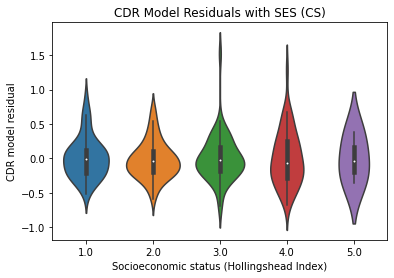

In [25]:
# Make a violin plot of cdr model residuals vs. SES
cs_cdr_violin_plot = sns.violinplot(x=cs_primary_data['SES'],
                                    y=cs_primary_data['CDR_residual'])
cs_cdr_violin_plot.set(xlabel='Socioeconomic status (Hollingshead Index)', 
                       ylabel='CDR model residual', 
                       title='CDR Model Residuals with SES (CS)')

The outlier residuals for the CDR model are also larger than we would have desired, so we know that CDR is not easily predicted by our predictor variables (just like MMSE).

The above models and graphs were for the cross-sectional data. We want to check if logistic regression would be better at predicting MMSE and CDR for the longitudinal data. Below we train those models and plot the residuals for each graph.

[Text(0, 0.5, 'MMSE model residual'),
 Text(0.5, 0, 'Socioeconomic status (Hollingshead Index)'),
 Text(0.5, 1.0, 'MMSE Model Residuals with SES (Long)')]

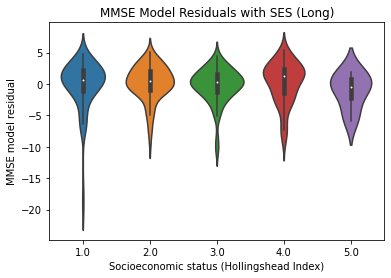

In [29]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
import seaborn as sns

# For linear regression we will drop rows with NaN values
long_data = long_data.dropna()

# Isolate the features that will be used as predictors
long_input = [
         long_data['Age'],
         long_data['EDUC'],long_data['SES'],
         long_data['eTIV'],long_data['nWBV'],
         long_data['ASF']]
long_input = np.vstack(long_input)
long_input = long_input.transpose()

# Fit a model for predicting MMSE
mmse_model = LinearRegression().fit(long_input, long_data['MMSE'])

# Fit a model for predicting CDR
cdr_model = LinearRegression().fit(long_input, long_data['CDR'])

# Calculate the residual for each row in the dataframe
for index, row in long_data.iterrows():
    long_data.loc[index, "MMSE_residual"] = row["MMSE"] \
    - mmse_model.predict(np.array([
        long_data['Age'][index],long_data['EDUC'][index],
        long_data['SES'][index],long_data['eTIV'][index],
        long_data['nWBV'][index],long_data['ASF'][index],
    ]).reshape(1, -1))

    long_data.loc[index, "CDR_residual"] = row["CDR"] \
    - cdr_model.predict(np.array([
        long_data['Age'][index],long_data['EDUC'][index],
        long_data['SES'][index],long_data['eTIV'][index],
        long_data['nWBV'][index],long_data['ASF'][index],
    ]).reshape(1, -1))

# Make a violin plot of model residuals vs. SES
long_mmse_violin_plot = sns.violinplot(x=long_data['SES'],
                                       y=long_data['MMSE_residual'])
long_mmse_violin_plot.set(xlabel='Socioeconomic status (Hollingshead Index)', 
                          ylabel='MMSE model residual',
                          title='MMSE Model Residuals with SES (Long)')

[Text(0, 0.5, 'CDR model residual'),
 Text(0.5, 0, 'Socioeconomic status (Hollingshead Index)'),
 Text(0.5, 1.0, 'CDR Model Residuals with SES (Long)')]

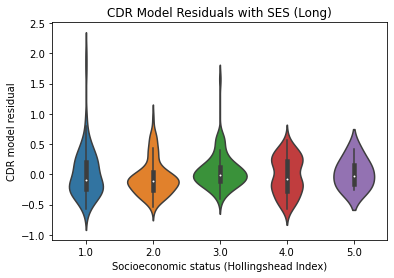

In [27]:
# Make a violin plot of model residuals vs. SES
long_mmse_violin_plot = sns.violinplot(x=long_data['SES'],
                                       y=long_data['CDR_residual'])
long_mmse_violin_plot.set(xlabel='Socioeconomic status (Hollingshead Index)', 
                          ylabel='CDR model residual',
                          title='CDR Model Residuals with SES (Long)')

Each of the above residual plots are similar to the residual plots from the cross-sectional data (most residuals are close to zero but significant outliers exist). This reveals that linear regression is most likely not the best method to use for our use case.

Instead we will try using a decision tree.

In general, a decision tree consists of multiple paths originating from a single point. These paths are made of nodes. At each node, a decision is made that determines what node you travel to next. In machine learning, decision trees' "decisions" are splits on variables that divide whatever inputs are fed to it. In a classification task, a decision tree splits the input data continuously in order to predict categories that a sample falls under. Regression tasks are similar, except the tree predicts a value for the target feature. Much like linear regression models, the algorithm used to make decision trees seeks to minimize loss between the predicted values and actual values for the samples in its training set.

Longitudinal MMSE classifier on longitudinal data R^2 Score: 0.9605021880017017
Longitudinal MMSE classifier on cross-sectional data R^2 Score: -0.1940454002986809
Longitudinal MMSE Decision Tree


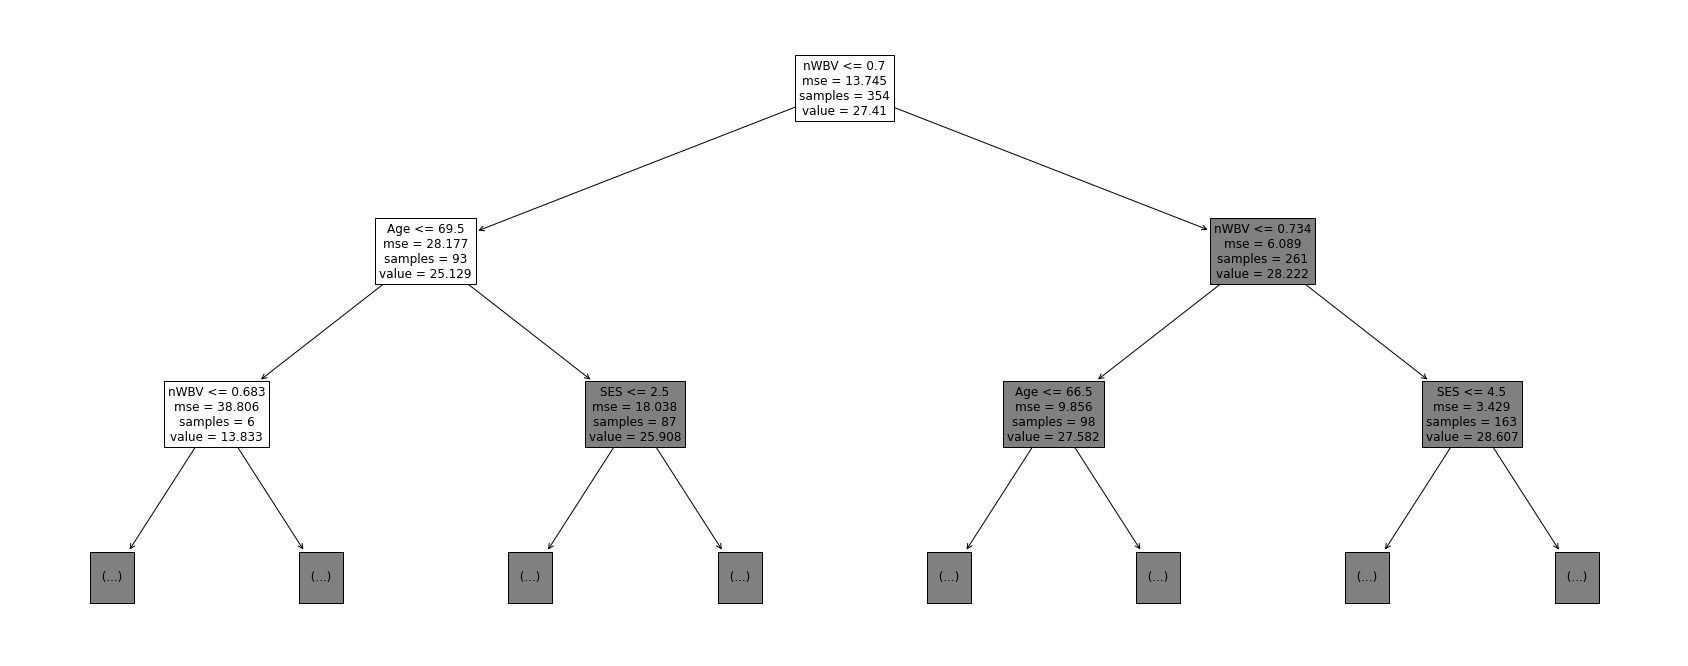

Cross-sectional MMSE classifier on cross-sectional data R^2 Score: 0.9827060656939669
Cross-sectional MMSE classifier on longitudinal data R^2 Score: -0.5040272983362324
Cross-sectional MMSE Decision Tree


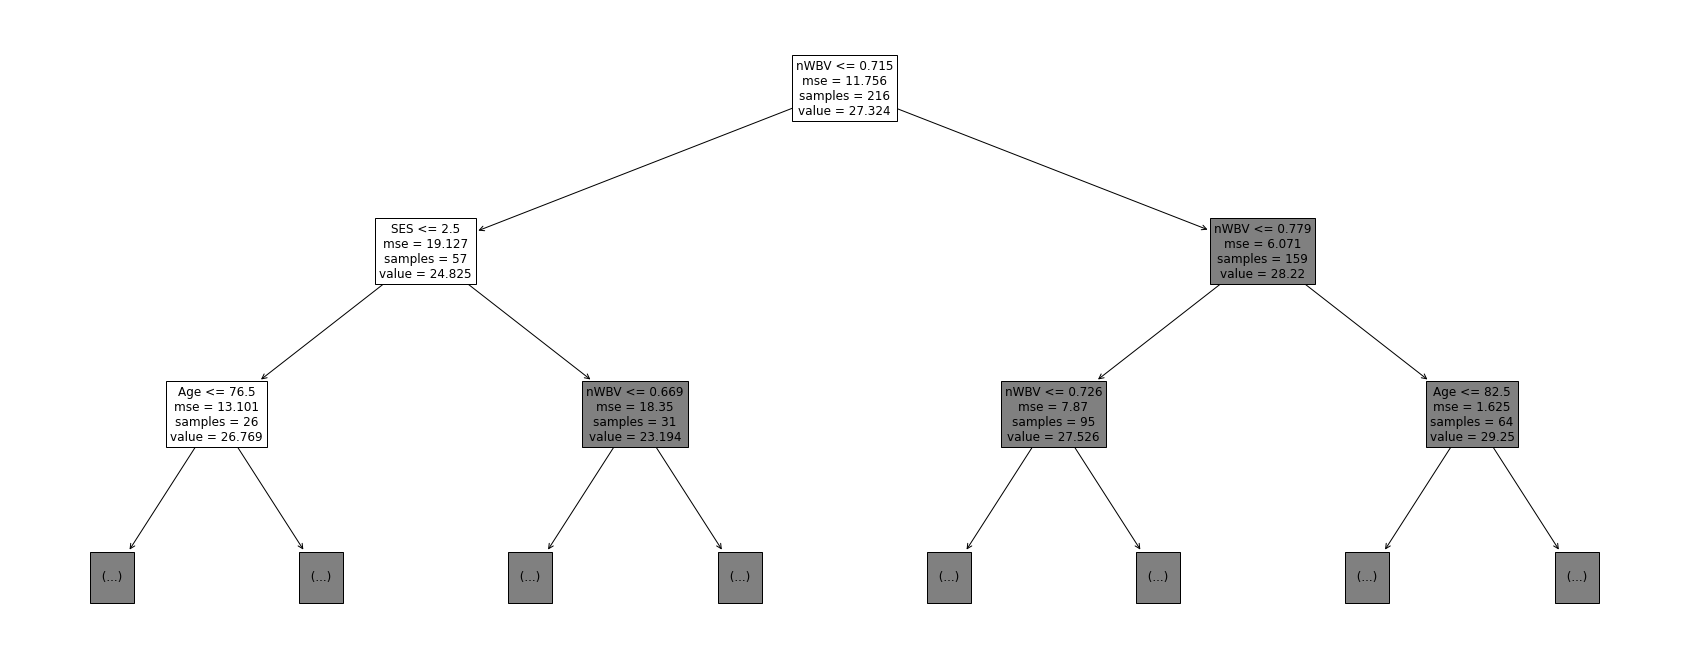

Longitudinal CDR classifier on longitudinal data R^2 Score: 0.9278824774186496
Longitudinal CDR classifier on cross-sectional data R^2 Score: 0.2786194230827047
Longitudinal CDR Decision Tree


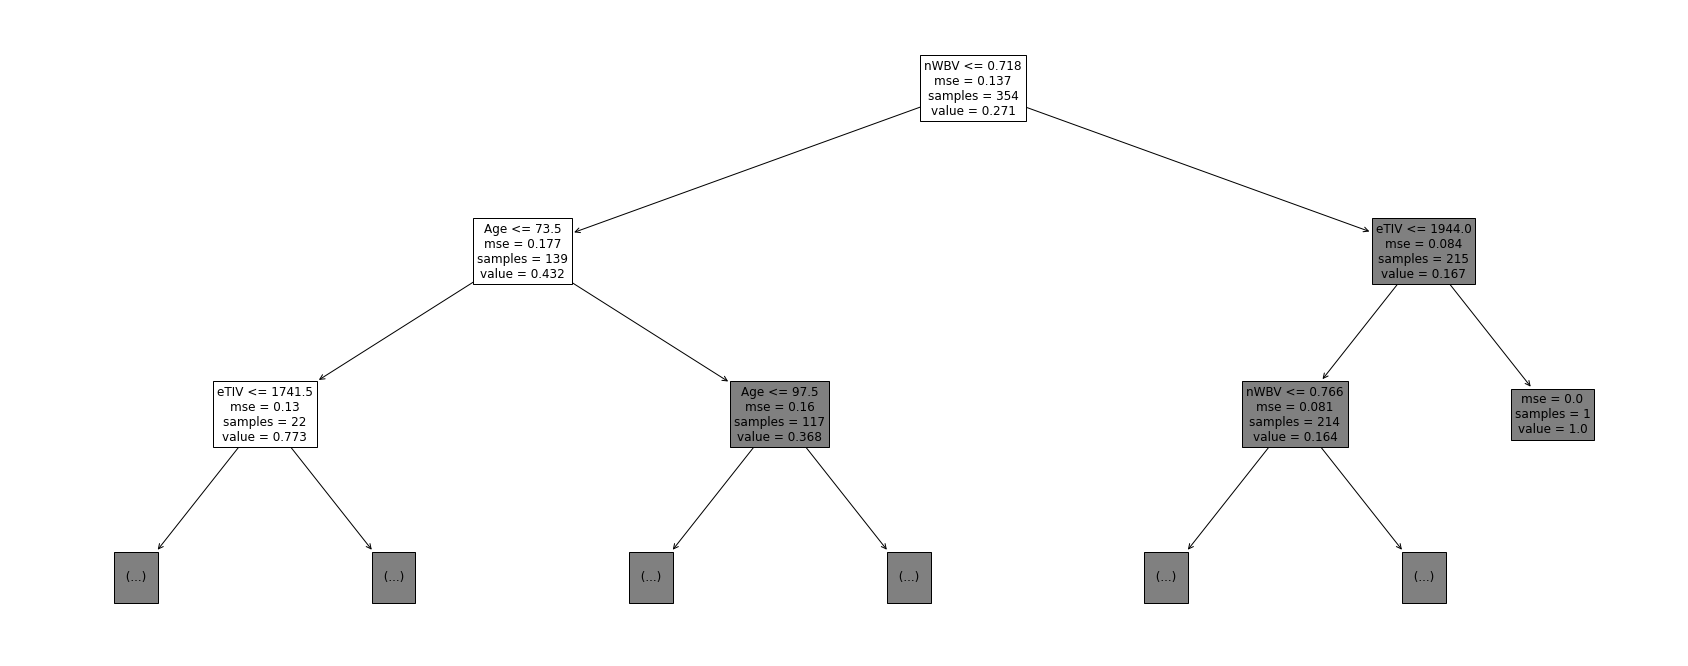

Cross-sectional CDR classifier on cross-sectional data R^2 Score: 0.9833180096355412
Cross-sectional CDR classifier on longitudinal data R^2 Score: -0.2501521244972895
Cross-sectional CDR Decision Tree


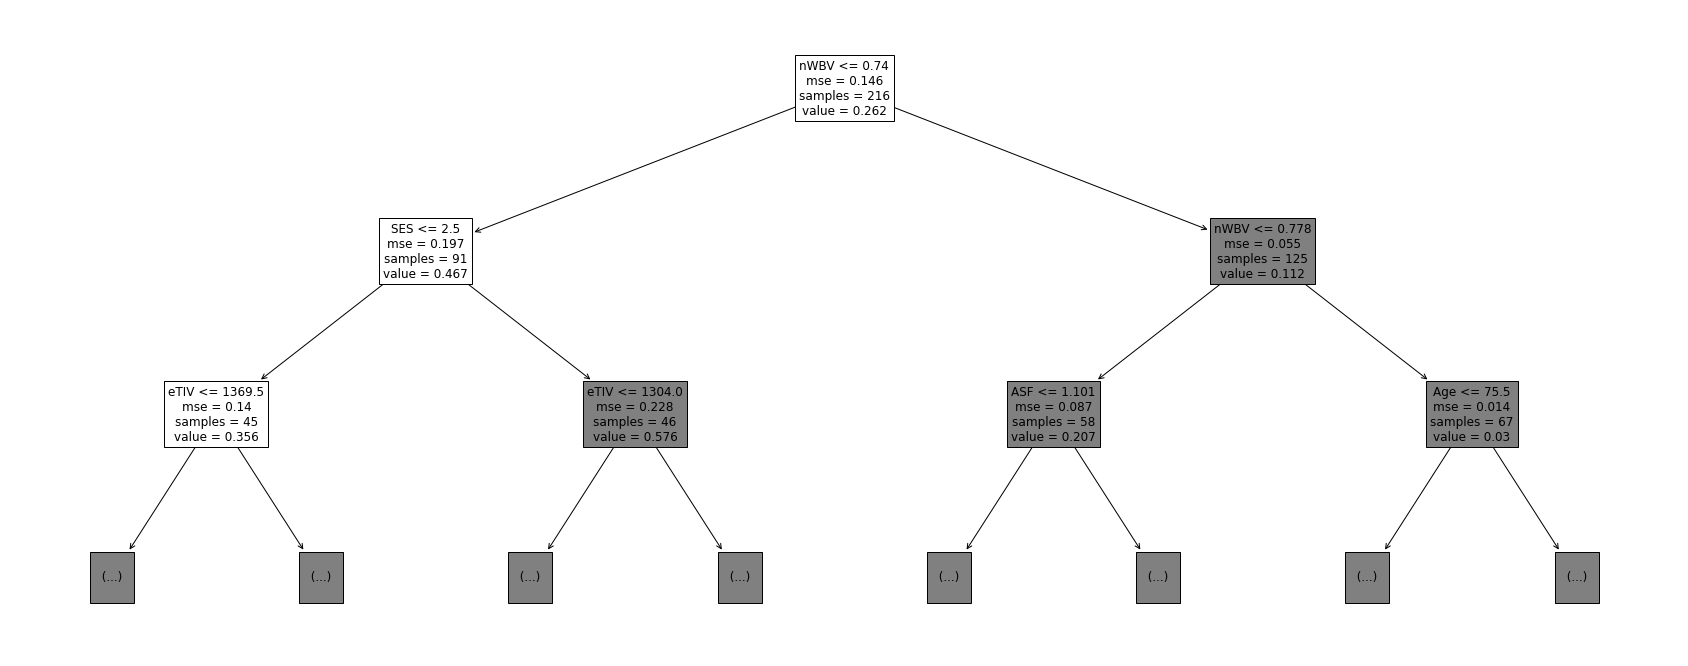

In [28]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

# Isolate the features that will be used as predictors from the
# longitudinal data. Education is not included this time because
# the education features use different scales in each dataset and
# we want to apply the decision trees to both data sets.
long_input = [
         long_data['Age'],
         long_data['SES'],
         long_data['eTIV'],long_data['nWBV'],
         long_data['ASF']]
long_input = np.vstack(long_input)
long_input = long_input.transpose()

# Isolate the features that will be used as predictors from the
# cross-sectional data.
cs_input = [
         cs_primary_data['Age'],
         cs_primary_data['SES'],
         cs_primary_data['eTIV'],cs_primary_data['nWBV'],
         cs_primary_data['ASF']]
cs_input = np.vstack(cs_input)
cs_input = cs_input.transpose()

# Make Decision Tree Regressor on long data for MMSE
long_clf_mmse = DecisionTreeRegressor(random_state=0,max_depth=10)
long_clf_mmse.fit(long_input, long_data['MMSE'])

# Print scores and plot the top of decision tree
print("Longitudinal MMSE classifier on longitudinal data R^2 Score: " + 
      str(long_clf_mmse.score(long_input, long_data['MMSE'])))
print("Longitudinal MMSE classifier on cross-sectional data R^2 Score: " +
      str(long_clf_mmse.score(cs_input, cs_primary_data['MMSE'])))
print("Longitudinal MMSE Decision Tree")
fig, ax = plt.subplots(figsize=(30, 12))
tree.plot_tree(long_clf_mmse,fontsize=12,feature_names=['Age','SES','eTIV','nWBV','ASF'],max_depth=2)
plt.show()

# Make Decision Tree Regressor on cross-sectional data for MMSE
cs_clf_mmse = DecisionTreeRegressor(random_state=0,max_depth=10)
cs_clf_mmse.fit(cs_input, cs_primary_data['MMSE'])

# Print scores and plot the top of decision tree
print("Cross-sectional MMSE classifier on cross-sectional data R^2 Score: " +
      str(cs_clf_mmse.score(cs_input, cs_primary_data['MMSE'])))
print("Cross-sectional MMSE classifier on longitudinal data R^2 Score: " +
      str(cs_clf_mmse.score(long_input, long_data['MMSE'])))
print("Cross-sectional MMSE Decision Tree")
fig, ax = plt.subplots(figsize=(30, 12))
tree.plot_tree(cs_clf_mmse,fontsize=12,feature_names=['Age','SES','eTIV','nWBV','ASF'],max_depth=2)
plt.show()

# Make Decision Tree Regressor on long data for CDR
long_clf_cdr = DecisionTreeRegressor(random_state=0,max_depth=10)
long_clf_cdr.fit(long_input, long_data['CDR'])

# Print scores and plot the top of decision tree
print("Longitudinal CDR classifier on longitudinal data R^2 Score: " +
      str(long_clf_cdr.score(long_input, long_data['CDR'])))
print("Longitudinal CDR classifier on cross-sectional data R^2 Score: " +
      str(long_clf_cdr.score(cs_input, cs_primary_data['CDR'])))
print("Longitudinal CDR Decision Tree")
fig, ax = plt.subplots(figsize=(30, 12))
tree.plot_tree(long_clf_cdr,fontsize=12,feature_names=['Age','SES','eTIV','nWBV','ASF'],max_depth=2)
plt.show()

# Make Decision Tree Regressor on cross-sectional data for CDR
cs_clf_cdr = DecisionTreeRegressor(random_state=0,max_depth=10)
cs_clf_cdr.fit(cs_input, cs_primary_data['CDR'])

# Print scores and plot the top of decision tree
print("Cross-sectional CDR classifier on cross-sectional data R^2 Score: " +
      str(cs_clf_cdr.score(cs_input, cs_primary_data['CDR'])))
print("Cross-sectional CDR classifier on longitudinal data R^2 Score: " +
      str(cs_clf_cdr.score(long_input, long_data['CDR'])))
print("Cross-sectional CDR Decision Tree")
fig, ax = plt.subplots(figsize=(30, 12))
tree.plot_tree(cs_clf_cdr,fontsize=12,feature_names=['Age','SES','eTIV','nWBV','ASF'],max_depth=2)
plt.show()

Above we make a decision tree from both the longitudinal and cross-sectional datasets for predicting both MMSE and CDR. Each tree was trained on one of the datasets and then used on both the set it was trained on and the dataset it was not trained on. Naturally, we would expect the R<sup>2</sup> for the training data to be very high and the R<sup>2</sup> for the other dataset to be lower. The R<sup>2</sup> on the training data is > 0.9 for each tree, so the decision trees are able to accurately predict the data from the dataset it was trained on. Unfortunately, the R<sup>2</sup> for the other dataset is extremely low for each of the decision trees (< 0 for three of the four datasets). This tells us that our decision trees are overfitted to the training data and are not good predictors of MMSE and CDR in a general sense. The trees all have a max depth of 10, which is responsible for both the high accuracy for the regression on the training set and the overfitting. Unfortunately, lowering the max depth did not significantly improve the performance for the trees on their testing data (but did lower their performance on their training data).

## Final Thoughts

The problem of predicting Dementia and Alzheimer's is a complicated one. It certainly cannot be cracked in a single tutorial. However, we have learned some important and interesting insights by analyzing MRI data of individuals with and without dementia. We believe these insights (although not groundbreaking) are related to deeper patterns that could be used to predict dementia and Alzheimers, hopefully leading to proactive therapy that can improve quality of life for individuals with those conditions.

Our MRI data has features directly tied to dementia and Alzheimer's. Mini-mental state examination (MMSE) and Clinical Dementia Rating (CDR) are measurements that are often used to quantify the severity of dementia and Alzheimer's. So we used these are our target features. Through exploratory data analysis we discovered several features that correlated with MMSE and or CDR. These features were socioeconomic status, education, nWBV, MMSE, ASF and age.

Then we applied machine learning to test whether the relationship between our predictors and targets could be used to accurately predict our targets. Using linear regression, we were able to accurately fit the data (except for an unfortunate amount of outliers). This proved the relationship between our predictors and targets was usable in machine learning, but perhaps linear regression would not be enough to properly predict MMSE and CDR. So we used decision trees. Unfortunately, we came across overfitting issues that were not easily resolved. It appears that more data would be required to better predict our targets.

One of our most surprising insights from analyzing the MRI data was how education and socioeconomic status have a relationship with CDR and MMSE. This relationship needs to be further researched to be understood. Are those with poorer (or greater) socioeconomic statuses more likely to have dementia or Alzheimer's later in life? Are the less (or more) educated likely to have more severe dementia symptoms? Our tutorial may not have answered these questions, but we were able to reach these questions due to our analysis.

## Related Links

If you want to do more with data science, or the problem of predicting Dementia and Alzheimer's, please see the following links:

**Statistical Analysis**
* [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
* [Correlation Matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

**Machine Learning**

*Linear Regression*
* [Linear Regression](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#:~:text=Linear%20Regression%20is%20a%20supervised,Simple%20regression
)
*[Ordinary Least Squares](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)

*Decision Trees*

* [Dementia Prediction w/ Tree-based Models](https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models
)

* [Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)

